<a href="https://colab.research.google.com/github/simonbernier/physique-ondes/blob/master/labo1_masse_ressort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratoire 1 : Le système masse-ressort

## 1. Introduction
Ce laboratoire a pour but l’étude du mouvement harmonique simple d’un système masse-ressort. Ce document vous aidera à faire l'analyse des données et est en même temps le document que vous devrez remettre pour la correction. Le document a été structuré d'avance pour vous et votre travail sera de compléter les sections manquantes de l'analyse.

### Usage de l'IA générative
Vous pouvez utiliser l'IA générative pour vous aider à compléter les lignes de code manquantes. Mais **attention**! Vous devez être en mesure d'expliquer ce que vous avez fait et les résultats doivent correspondre aux attentes des laboratoires en physique. Surtout, posez des questions si vous ne comprenez pas ce qui doit être fait.

In [ ]:
"""
Dans un script Python, nous devons toujours commencer par importer des bibliothèques
de fonctions qui sont déjà écrites et que nous utiliserons dans notre analyse
"""
import numpy as np # vecteurs et beaucoup de fonctions mathématiques utiles
import matplotlib.pyplot as plt # pour faire de beaux graphiques
import pandas as pd # permet de faire des tableaux

# Scipy est excellent pour l'analyse scientifique
from scipy.stats.distributions import t # ici nous importons seulement la distribution "t" de Student

# Configuration pour des graphiques plus lisibles, NE PAS MODIFIER
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# nous pouvons définir de nouvelles fonctions de la façon suivante, NE PAS MODIFIER
def arrondir_cs(valeur, incertitude):
    """
    Pour arrondir une valeur et son incertitude.
    Retourne une incertitude avec un chiffre significatif et une valeur arrondie
    au bon nombre de décimales
    arguments : valeur, incertitude
    retourne : val_arrondie, inc_arrondie
    """
    # Gestion des cas où l'incertitude est nulle ou infinie
    if incertitude == 0 or np.isnan(incertitude) or np.isinf(incertitude):
        return valeur, incertitude

    # Déterminer l'ordre de grandeur de l'incertitude
    # Ex: log10(0.035) = -1.45 -> floor = -2. On veut arrondir à la 2e décimale.
    # Ex: log10(350) = 2.54 -> floor = 2. On veut arrondir aux centaines (-2 décimales).
    ordre = np.floor(np.log10(np.abs(incertitude)))

    # Le nombre de décimales est l'opposé de l'ordre de grandeur
    nb_decimales = -int(ordre)

    # Arrondir l'incertitude à 1 chiffre significatif
    inc_arrondie = round(incertitude, nb_decimales)

    # Correction pour le cas où l'arrondi fait changer l'ordre (ex: 0.095 -> 0.10)
    if np.floor(np.log10(np.abs(inc_arrondie))) != ordre:
        nb_decimales -= 1 # enlever une décimale additionnelle

    # 3. Arrondir la valeur à la même précision que l'incertitude
    val_arrondie = round(valeur, nb_decimales)

    return val_arrondie, inc_arrondie # la fonction retourne ces deux valeurs

# cette ligne permet d'utiliser la fonction précédente avec des vecteurs Numpy
arrondir_valeurs = np.vectorize(arrondir_cs)

ModuleNotFoundError: No module named 'pandas'

## 2. Données Expérimentales
Commencez par entrer vos mesures ci-dessous.
Rappel : Vous devez avoir mesuré le temps pour cinq oscillations pour réduire l'incertitude.

Calculez la valeur centrale et l'incertitude de la période pour chaque masse avec la méthode des extrêmes
$$ T_\text{cen} = \frac{T_{max} + T_{min}}{2} \quad\text{et}\quad \Delta T = \frac{T_{max} - T_{min}}{2}$$

Vos données doivent respecter les règles des chiffres significatifs. Utilisez la fonction `arrondir_valeurs(valeur, incertitude)`

In [ ]:
# Entrez les masses en kg (ex: [0.050, 0.100, ...])
masses = np.array([...]) # <--- À FAIRE

# Incertitude sur la masse (en kg)
delta_m = ... # <--- À FAIRE

# Entrez les périodes mesurées en secondes
n_periodes = 5 # nombre d'oscillations mesurées
essais_5_periodes = np.array([  [...], # masse 1 <--- MODIFIEZ CECI
                                [...], # masse 2
                                [...], # masse 3
                                [...], # masse 4
                                [...]  # masse 5
                            ])

# Calculez le temps pour une période pour chacun de vos essais
essais = ... # À FAIRE

# Calcul de la Période avec la méthode des extrêmes, NE PAS MODIFIER
# La valeur centrale est donnée par ( MAX(essais) + MIN(essais) )/2
periodes = (np.max(essais, axis=1) + np.min(essais, axis=1))/2

# L'incertitude est données par ( MAX(essais) - MIN(essais) )/2
delta_T = (np.max(essais, axis=1) - np.min(essais, axis=1))/2

# Arrondir les périodes au bon nombre de chiffres significatifs
periodes, delta_T = ...

# Création d'un tableau de données, NE PAS MODIFIER
# Vérifiez que vos données soient cohérentes!
df = pd.DataFrame({
    'Masse (kg)': masses,
    'Incertitude Masse (kg)': delta_m,
    'Période T (s)': periodes,
    'Incertitude T (s)': delta_T
})

# Affichage du tableau
display(df)

NameError: name 'np' is not defined

## 3. Linéarisation et Analyse
Pour faire l'analyse, nous ferons une *linéarisation* de nos données. Le but est de transformer une relation qui n'est initialement pas linéaire (une ligne droite) en une équation pouvons s'écrire sous la forme $Y = a\cdot X+b$ où $X$ est la variable indépendante, $Y$ est la variable dépendante, $a$ est la pente de la droite et $b$ est l'ordonnée à l'origine.

L'équation théorique est :
$$ T = 2\pi \sqrt{\frac{m}{k}} $$

Pour linéariser cette équation, nous allons élever les deux côtés au carré :
$$ T^2 = \frac{4\pi^2}{k} m $$

Ici, notre variable dépendante $Y$ est le carré de la période $T^2$ et notre variable indépendante $X$ est la masse $m$. À quoi correspond la pente $a$ et l'ordonée à l'origine $b$ dans cette situation?

**Calcul des incertitudes propagées :**
Puisque $Y = T^2$, nous devons propager l'incertitude $\Delta T$ afin de produire un graphique. Pour y arriver, nous utilisons la formule suivante :
$$ \frac{\Delta(T^2)}{T^2} = 2 \frac{\Delta T}{T} $$
$$ \Rightarrow \Delta(T^2) = T^2 \cdot 2 \frac{\Delta T}{T} = 2 T \Delta T $$

Ici, vos données linéarisées ne respecteront plus les règles des chiffres significatifs. Techniquement, vous devez arrondir les valeurs avec la fonction `arrondir_valeurs()` définit précédemment, mais nous allons glisser ceci sous le tapis pour éviter de se perdre dans les détails.

In [ ]:
# Calcul des variables linéarisées
# Quelle variable va en X ? Quelle variable va en Y?
x_vals = ... # À FAIRE

# Quelle variable va en Y ?
# ATTENTION : En Python, l'exposant s'écrit ** (ex: 3 au carré s'écrit 3**2)
y_vals = ... # À FAIRE

# Propagation des incertitudes (voir formule ci-dessus)
delta_x = ... # À FAIRE
delta_y = ... # À FAIRE

# Ajout des valeurs linéarisées au tableau pour visualisation, NE PAS MODIFIER
df[r'$T^2 (s^2)$'] = y_vals
df[r'Incertitude $T^2 (s^2)$'] = delta_y
display(df)

NameError: name 'df' is not defined

## 4. Graphique et Régression Linéaire
Nous allons maintenant tracer un graphique de $T^2$ en fonction de $m$ et effectuer une régression linéaire pour trouver la pente et l'ordonnée à l'origine, ainsi que leurs incertitudes respectives. Dans Numpy, il existe déjà une fonction de régression linéaire nommée `np.polyfit()` qui calcule les paramètres $a$ et $b$ ainsi que leur matrice de **covariance**. Pour calculer l'incertitude sur les paramètres, correspondant à l'intervalle de confiance de 95% (comme ce qui était fait dans le cours N02), nous devons utiliser la matrice de **covariance**.

Sans trop nous perdre dans les détails, la matrice de covariance est liée directement à l'écart-type $\sigma$ des paramètres. En N02, vous calculiez l'incertitude sur un paramètre en faisant
$$\Delta a = 2\sigma_a .$$
En fait, c'est un peu plus subtil que ça. Le facteur de "2" n'est pas arbitraire, il doit être déterminé!! Il doit prendre en compte le nombre de données dont nous disposons, le nombre de paramètres que nous essayons de déterminer et l'intervalle de confiance qui nous intéresse. C'est ici que nous utilisons la distribution T de Student pour **automatiser** l'analyse! Ainsi, nous allons plutôt calculer l'incertitude avec
$$\Delta a = t_\text{S} \sigma_a,$$
où $t_\text{S}$ est calculé dans le code pour vous et vaut presque 2 lorsque nous avons beaucoup de données!

In [ ]:
# Régression linéaire
# La fonction polyfit de degré 1 retourne un vecteur params = [pente, ordonnée à l'origine]
# La matrice de covariance (cov=True) nous permet d'avoir l'incertitude sur la pente et l'ordonnée à l'origine
params, cov = np.polyfit(..., ..., 1, cov=True) # À FAIRE
a, b = params # ceci extrait les valeurs du vecteur params

# Déterminer la valeur du t_S avec la distribution de Student, NE PAS MODIFIER
# ddl : degrés de liberté du modèle (nombre de données - nombre de paramètres à déterminer)
ddl = len(x_vals) - len(params)
# intervalle de confiance
alpha = 0.05 # on veut une intervalle de confiance de 95% -> 100*(1 - alpha)
# facteur de Student qui prend en compte le nombre de données, le nombre de paramètres et l'intervalle de confiance
tval = t.ppf(1.0 - alpha / 2.0, ddl) # utilise la distribution T de Student importé de Scipy
print(f"degrés de liberté = {ddl:d}, tval = {tval:.3f}")

# Calcul des incertitudes sur la pente, NE PAS MODIFIER
# Nous calculons delta = t_S * écart-type
delta_a, delta_b = tval * np.sqrt(np.diag(cov)) # l'incertitude est tval * écart-type

# --- CODE POUR LE GRAPHIQUE, NE PAS MODIFIER ---
# Génération des points pour la droite de tendance
x_model = np.linspace(min(x_vals), max(x_vals), 100)
y_model = a * x_model + b

# Création du graphique avec matplotlib.yplot
plt.errorbar(x_vals, y_vals, xerr=delta_x, yerr=delta_y, fmt='o', capsize=3, label='Données exp.', color='navy')
plt.plot(x_model, y_model, 'r-', label=rf'Régression: $T^2$ = ({a:.3f} $\pm$ {delta_a:.3f}) m + ({b:.3f} $\pm$ {delta_b:.3f})')

plt.title("Graphique 1 : Vérification du modèle théorique d'un OSH")
plt.xlabel('Masse (kg)')
plt.ylabel('Période au carré $T^2$ ($s^2$)')
plt.legend()
plt.grid(True)
plt.show()

TypeError: unsupported operand type(s) for +: 'ellipsis' and 'float'

## 5. Calcul de la constante de rappel (k)

D'après notre linéarisation, la pente correspond à :
$$ a = \frac{4\pi^2}{k} $$

On peut donc isoler $k$ :
$$ k = \frac{4\pi^2}{a} $$

Calculez la valeur de $k$ et son incertitude ci-dessous. Vous ne pouvez pas utiliser la méthode des extrêmes pour déterminer l'incertitude sur la constante de rappel!

In [ ]:
# Calcul de k expérimental
k_exp = ... # À FAIRE

# Propagation de l'incertitude sur k
# vous ne pouvez pas utiliser la méthode des extrêmes
delta_k = ... # À FAIRE

# On doit faire bien attention d'arrondir correctement les valeurs finales pour la comparaison
k_exp, delta_k = arrondir_valeurs(k_exp, delta_k)

print(f"La constante de rappel expérimentale est : k = ({k_exp:.1f} ± {delta_k:.1f}) N/m")

La constante de rappel expérimentale est : k = (3.5 ± 0.3) N/m


### 5.1 Comparaison Quantitative
Cette section analyse la concordance entre votre résultat expérimental et la valeur théorique, en tenant compte des incertitudes sur les DEUX valeurs.

1. **Précision (% inc. rel.) :** L'incertitude relative d'une valeur.
2. **Exactitude (% d'écart) :** L'écart relatif entre deux valeurs.
3. **Critère de concordance :** Pour que deux mesures soient concordantes, leurs intervalles d'incertitude doivent se chevaucher. Mathématiquement, la différence entre les valeurs doit être inférieure à la somme des incertitudes :
   $$|k_{exp} - k_{théo}| \le (\Delta k_{exp} + \Delta k_{théo})$$
   Graphiquement, nous pouvons faire un **diagramme de comparaison** et identifier la présence (ou non) d'un intervalle de concordance entre les deux valeurs.


--- RÉSULTATS COMPARATIFS ---
Expérimental (k_exp) : (3.5 ± 0.3) N/m
Théorique    (k_theo) : (3.50 ± 0.05) N/m
Pourcentage d'inc. rel. : 8.57 %
Pourcentage d'écart   : 0.00 %
------------------------------


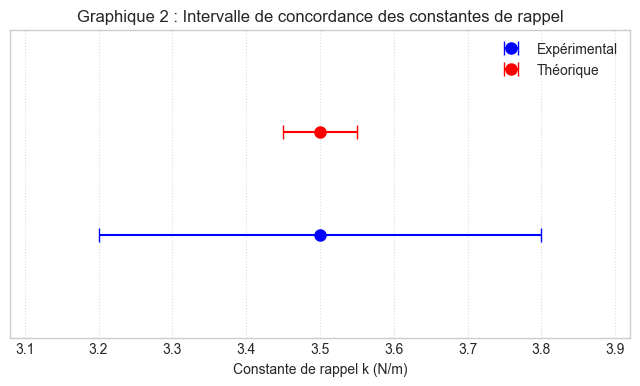


✅ CONCLUSION : Les valeurs CONCORDENT.
Les intervalles d'incertitude se chevauchent.


In [ ]:
# Entrez les valeurs théoriques données par le fabricant (N/m)
k_theo = ...       # <--- À FAIRE
delta_k_theo = ... # <--- À FAIRE

# Calcul du % inc. rel. (Précision) pour CHAQUE valeur
inc_rel_exp = ... # À FAIRE
inc_rel_theo = ... # À FAIRE

# Calcul du % d'écart (Exactitude)
# Vous pouvez utiliser la fonction 'valeur absolue' avec abs()
pourcentage_ecart = ... # À FAIRE

# -------- NE PAS MODIFIER --------
print(f"--- RÉSULTATS COMPARATIFS ---")
print(f"Expérimental (k_exp) : ({k_exp:.1f} ± {delta_k:.1f}) N/m")
print(f"Théorique    (k_theo) : ({k_theo:.2f} ± {delta_k_theo:.2f}) N/m")
print(f"% inc. rel. exp. : {inc_rel_exp:.2f} %")
print(f"% inc. rel. théo. : {inc_rel_theo:.2f} %")
print(f"Pourcentage d'écart   : {pourcentage_ecart:.2f} %")
print(f"-"*30)

# Diagramme de comparaison des valeurs expérimentale et théorique, NE PAS MODIFIER
# Graphique de concordance
plt.figure(figsize=(8, 4))
plt.title("Graphique 2 : Diagramme de comparaison des constantes de rappel")

# Point Expérimental (en Bleu, position y=1)
plt.errorbar(x=k_exp, y=1, xerr=delta_k, fmt='o', capsize=5,
             label='Expérimental', color='blue', markersize=8)

# Point Théorique (en Rouge, position y=2 pour bien séparer visuellement)
plt.errorbar(x=k_theo, y=1.5, xerr=delta_k_theo, fmt='o', capsize=5,
             label='Théorique', color='red', markersize=8)

# Mise en forme
plt.yticks([]) # Cache l'axe Y
plt.xlabel('Constante de rappel k (N/m)')
plt.ylim(0.5, 2.0)

# Ajustement dynamique de l'axe X pour tout voir
min_val = min(k_exp - delta_k, k_theo - delta_k_theo)
max_val = max(k_exp + delta_k, k_theo + delta_k_theo)
marge = (max_val - min_val) * 0.2
plt.xlim(min_val - marge, max_val + marge)

plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

### Comparaison de l'ordonnée à l'origine

La relation théorique $$T^2 =\frac{4\pi^2}{k} m$$ prévoit que la valeur théorique de l'ordonnée à l'origine est **exactement** zéro. Pour comparer une valeur expérimentale à une valeur théorique de zéro, le % d'écart et le % d'incertitude relative ne sont plus utiles. La seule façon de faire une bonne comparaison est de d'étudier l'intervalle de concordance. Ici, nous faisons

--- RÉSULTATS COMPARATIFS ---
Expérimental (ordonnée) : (0.3 ± 0.2) s²
------------------------------


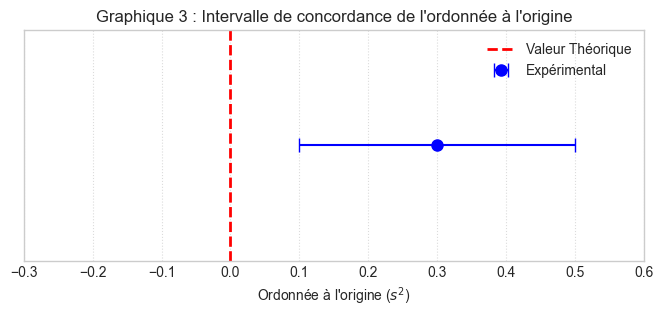

In [ ]:
# arrondir les valeurs au bon nombre de chiffres significatifs
b, delta_b = ... # À FAIRE

print(f"--- RÉSULTATS COMPARATIFS ---")
print(f"Expérimental (ordonnée) : ({b:.1f} ± {delta_b:.1f}) s²")
print(f"-"*30)

# Graphique de l'intervalle de concordance
plt.figure(figsize=(8, 3))
plt.title("Graphique 3 : Diagramme de comparaison de l'ordonnée à l'origine")

# Point expérimental avec barre d'erreur
plt.errorbar(x=b, y=1, xerr=delta_b, fmt='o', capsize=5, label='Expérimental', color='blue', markersize=8)

# Ligne pour la valeur théorique
plt.axvline(x=0, color='red', linestyle='--', label='Valeur Théorique', linewidth=2)

# Mise en forme pour ressembler à un axe numérique
plt.yticks([]) # Cache l'axe Y
plt.xlabel("Ordonnée à l'origine ($s^2$)")
# Ajustement dynamique des limites du graphique pour bien voir les deux valeurs
center = b / 2
span = max(abs(b), delta_b) * 1.5
plt.xlim(center - span, center + span)
plt.ylim(0.8, 1.2)
plt.legend()
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.show()

## 6. Discussion

Discutez de vos résultats.

*Répondez ici :*

### Analyse qualitative
1. L'ordonnée à l'origine est-elle proche de 0 comme prévu par la théorie ? Si non, quelle pourrait être la cause physique?\
       *Répondre ici*
2. Vos résultats sont-ils conformes à la théorie vue en classe ?\
       *Répondre ici*
3. Quelles sont les sources d'erreurs dominantes ?\
       *Répondre ici*

### 7. Conclusion
*Résumez vos résultats principaux, répondez aux objectifs du laboratoire et rédigez une ouverture.*